In [1]:
import os

import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
from gammapy.datasets import FluxPointsDataset
from gammapy.modeling.models import Models

from asgardpy.analysis import AsgardpyAnalysis
from asgardpy.config import AsgardpyConfig

In [2]:
# os.environ['GAMMAPY_DATA']

In [3]:
config_file = "../src/asgardpy/tests/config_test_base.yaml"

In [4]:
config = AsgardpyConfig()

In [5]:
config_main = config.read(config_file)
only_3d_config = config.read(config_file)
only_1d_config = config.read(config_file)

# Update path of test data

In [6]:
config_main.dataset3d.instruments[0].input_dl3[0].input_dir = f"{os.environ['GAMMAPY_DATA']}fermipy-crab/"
config_main.dataset3d.instruments[0].input_dl3[1].input_dir = f"{os.environ['GAMMAPY_DATA']}fermipy-crab/"
config_main.dataset1d.instruments[0].input_dl3[0].input_dir = f"{os.environ['GAMMAPY_DATA']}hess-dl3-dr1/"
config_main.dataset1d.instruments[1].input_dl3[0].input_dir = f"{os.environ['GAMMAPY_DATA']}magic/rad_max/data/"

only_3d_config.dataset3d.instruments[0].input_dl3[0].input_dir = f"{os.environ['GAMMAPY_DATA']}fermipy-crab/"
only_3d_config.dataset3d.instruments[0].input_dl3[1].input_dir = f"{os.environ['GAMMAPY_DATA']}fermipy-crab/"
only_1d_config.dataset1d.instruments[0].input_dl3[0].input_dir = f"{os.environ['GAMMAPY_DATA']}hess-dl3-dr1/"
only_1d_config.dataset1d.instruments[1].input_dl3[0].input_dir = f"{os.environ['GAMMAPY_DATA']}magic/rad_max/data/"

In [7]:
config_main.general.model_dump()

{'log': {'level': 'info',
  'filename': '',
  'filemode': 'w',
  'format': '',
  'datefmt': ''},
 'outdir': PosixPath('.'),
 'n_jobs': 10,
 'parallel_backend': 'multiprocessing',
 'steps': ['datasets-3d', 'datasets-1d', 'fit', 'flux-points'],
 'overwrite': True,
 'stacked_dataset': True}

# Steps mentioned in the main config file

In [8]:
config_main.general.steps

['datasets-3d', 'datasets-1d', 'fit', 'flux-points']

# Target source information

In [9]:
config_main.target.model_dump()

{'source_name': '4FGL J0534.5+2201i',
 'sky_position': {'frame': 'icrs',
  'lon': <Quantity 83.6338333 deg>,
  'lat': <Quantity 22.0145 deg>,
  'radius': <Quantity 0. deg>},
 'use_uniform_position': True,
 'models_file': PosixPath('.'),
 'datasets_with_fov_bkg_model': [],
 'use_catalog': {'name': '',
  'selection_radius': <Quantity 0. deg>,
  'exclusion_radius': <Quantity 0. deg>},
 'components': [{'name': '4FGL J0534.5+2201i',
   'type': 'SkyModel',
   'datasets_names': [''],
   'spectral': {'type': 'LogParabolaSpectralModel',
    'parameters': [{'name': 'amplitude',
      'value': 1e-07,
      'unit': 'cm-2 s-1 TeV-1',
      'error': 1.5e-08,
      'min': 1e-13,
      'max': 0.0001,
      'frozen': False},
     {'name': 'reference',
      'value': 0.015,
      'unit': 'TeV',
      'error': 0.0,
      'min': 0.0001,
      'max': 100.0,
      'frozen': True},
     {'name': 'alpha',
      'value': 1.7,
      'unit': '',
      'error': 0.05,
      'min': 0.5,
      'max': 3.0,
      'fro

# Datasets informations

In [10]:
config_main.dataset3d.model_dump()

{'type': '3d',
 'instruments': [{'name': 'Fermi-LAT',
   'input_dl3': [{'type': 'lat',
     'input_dir': PosixPath('/home/chaitanya/software/gammapy-datasets/1.3/fermipy-crab'),
     'glob_pattern': {'events': '*ft*.fits*',
      'edisp': 'drm*.fits*',
      'xml_model': 'srcmdl*.xml',
      'exposure': 'bexpmap*.fits*',
      'psf': 'psf*.fits*'}},
    {'type': 'lat-aux',
     'input_dir': PosixPath('/home/chaitanya/software/gammapy-datasets/1.3/fermipy-crab'),
     'glob_pattern': {'gal_diffuse': 'gll_iem_v07_cutout.fits*',
      'iso_diffuse': 'iso_P8R3_SOURCE_V3_*.txt'}}],
   'input_dl4': False,
   'dataset_info': {'name': 'Fermi-LAT',
    'key': ['00', '01'],
    'observation': {'obs_ids': [],
     'obs_file': PosixPath('.'),
     'obs_time': [],
     'obs_cone': {'frame': 'icrs',
      'lon': <Quantity 0. deg>,
      'lat': <Quantity 0. deg>,
      'radius': <Quantity 0. deg>},
     'required_irfs': ['aeff']},
    'map_selection': ['counts', 'exposure', 'background', 'psf', 'edis

In [11]:
config_main.dataset1d.model_dump()

{'type': '1d',
 'instruments': [{'name': 'HESS',
   'input_dl3': [{'type': 'gadf-dl3',
     'input_dir': PosixPath('/home/chaitanya/software/gammapy-datasets/1.3/hess-dl3-dr1'),
     'glob_pattern': {'dl3_files': 'data/hess_*fits.gz'}}],
   'input_dl4': False,
   'dataset_info': {'name': 'HESS',
    'geom': {'wcs': {'skydir': {'frame': 'icrs',
       'lon': <Quantity 0. deg>,
       'lat': <Quantity 0. deg>,
       'radius': <Quantity 0. deg>},
      'binsize': <Quantity 0.02 deg>,
      'proj': 'TAN',
      'map_frame_shape': {'width': <Quantity 6. deg>,
       'height': <Quantity 6. deg>},
      'binsize_irf': <Quantity 0.2 deg>},
     'selection': {'offset_max': <Quantity 2.5 deg>},
     'axes': [{'name': 'energy',
       'axis': {'min': <Quantity 0.1 TeV>,
        'max': <Quantity 100. TeV>,
        'nbins': 5,
        'per_decade': True},
       'axis_custom': {'edges': [], 'unit': 'TeV'}},
      {'name': 'energy_true',
       'axis': {'min': <Quantity 0.1 TeV>,
        'max': <Qu

In [12]:
config_main.fit_params.model_dump()

{'fit_range': {'min': <Quantity 1. GeV>, 'max': <Quantity 40. TeV>},
 'backend': 'minuit',
 'optimize_opts': {},
 'covariance_opts': {},
 'confidence_opts': {},
 'store_trace': True}

In [13]:
config_main.flux_points_params.model_dump()

{'parameters': {'selection_optional': 'all'}, 'reoptimize': False}

In [14]:
analysis = AsgardpyAnalysis(config_main)

Setting logging config: {'level': 'INFO', 'filename': '', 'filemode': 'w', 'format': '', 'datefmt': ''}


In [15]:
only_3d_analysis = AsgardpyAnalysis(only_3d_config)

Setting logging config: {'level': 'INFO', 'filename': '', 'filemode': 'w', 'format': '', 'datefmt': ''}


In [16]:
only_1d_analysis = AsgardpyAnalysis(only_1d_config)

Setting logging config: {'level': 'INFO', 'filename': '', 'filemode': 'w', 'format': '', 'datefmt': ''}


In [17]:
analysis

## Update the Target parameters for only 1D analysis, in the config

In [18]:
print(only_3d_analysis.config.target.components[0].spectral.parameters[0])
only_1d_analysis.config.target.components[0].spectral.parameters[0].value = 1e-9
only_1d_analysis.config.target.components[0].spectral.parameters[0].error = 1e-10
print(only_1d_analysis.config.target.components[0].spectral.parameters[0])

name='amplitude' value=1e-07 unit='cm-2 s-1 TeV-1' error=1.5e-08 min=1e-13 max=0.0001 frozen=False
name='amplitude' value=1e-09 unit='cm-2 s-1 TeV-1' error=1e-10 min=1e-13 max=0.0001 frozen=False


In [19]:
print(only_1d_analysis.config.target.components[0].spectral.parameters[1])
only_1d_analysis.config.target.components[0].spectral.parameters[1].value = 0.4
print(only_1d_analysis.config.target.components[0].spectral.parameters[1])

name='reference' value=0.015 unit='TeV' error=0.0 min=0.0001 max=100.0 frozen=True
name='reference' value=0.4 unit='TeV' error=0.0 min=0.0001 max=100.0 frozen=True


In [20]:
print(only_1d_analysis.config.target.components[0].spectral.parameters[2])
only_1d_analysis.config.target.components[0].spectral.parameters[2].value = 2.0
print(only_1d_analysis.config.target.components[0].spectral.parameters[2])

name='alpha' value=1.7 unit='' error=0.05 min=0.5 max=3.0 frozen=False
name='alpha' value=2.0 unit='' error=0.05 min=0.5 max=3.0 frozen=False


# Update Fit params

In [21]:
print(only_3d_analysis.config.fit_params.fit_range.max)
only_3d_analysis.config.fit_params.fit_range.max = "500 GeV"
print(only_3d_analysis.config.fit_params.fit_range.max)

40.0 TeV
500.0 GeV


In [22]:
print(only_1d_analysis.config.fit_params.fit_range.min)
only_1d_analysis.config.fit_params.fit_range.min = "100 GeV"
print(only_1d_analysis.config.fit_params.fit_range.min)

1.0 GeV
100.0 GeV


# Run all the steps

In [23]:
%%time
analysis.run()

Perform DL3 to DL4 process!
1 number of 3D Datasets given
The different keys used: 00 01
Selecting the file with name containing 00
Selecting the file with name containing 00
Selecting the file with name containing 00
Selecting the file with name containing 00
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
Set MJD-OBS to 58484.000000 from DATE-OBS.
Set MJD-END to 59729.988334 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 58484.000000 from DATE-OBS.
Set MJD-END to 59729.988334 from DATE-END'.
Using the exclusion mask to create a safe mask
Selecting the file with name containing 01
Selecting the file with name containing 01
Selecting the file with name containing 01
Selecting the file with name containing 01
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
Set MJD-OBS to 58484.000000 from DATE-OBS.
Set MJD-END to 59729.988334 from DATE-END'. [astr

CPU times: user 39.6 s, sys: 2.52 s, total: 42.1 s
Wall time: 53.8 s


In [24]:
%%time
only_3d_analysis.run(["datasets-3d", "fit", "flux-points"])

Perform DL3 to DL4 process!
1 number of 3D Datasets given
The different keys used: 00 01
Selecting the file with name containing 00
Selecting the file with name containing 00
Selecting the file with name containing 00
Selecting the file with name containing 00
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
Set MJD-OBS to 58484.000000 from DATE-OBS.
Set MJD-END to 59729.988334 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 58484.000000 from DATE-OBS.
Set MJD-END to 59729.988334 from DATE-END'.
Using the exclusion mask to create a safe mask
Selecting the file with name containing 01
Selecting the file with name containing 01
Selecting the file with name containing 01
Selecting the file with name containing 01
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
Set MJD-OBS to 58484.000000 from DATE-OBS.
Set MJD-END to 59729.988334 from DATE-END'. [astr

CPU times: user 40.2 s, sys: 2.14 s, total: 42.3 s
Wall time: 52.9 s


In [25]:
%%time
only_1d_analysis.run(["datasets-1d", "fit", "flux-points"])

Perform DL3 to DL4 process!
2 number of 1D Datasets given
Observation ID list selected: 23523 23526
Observations selected: 2 out of 2.
Using 2 processes to compute Data reduction
Computing dataset for observation 23523
Computing dataset for observation 23526
Running SpectrumDatasetMaker
Running SpectrumDatasetMaker
Running SafeMaskMaker
Running SafeMaskMaker
Running ReflectedRegionsBackgroundMaker
Running ReflectedRegionsBackgroundMaker
Observation ID list selected: 5029747 5029748
Observations selected: 2 out of 2.
Using 2 processes to compute Data reduction
Computing dataset for observation 5029747
Computing dataset for observation 5029748
Running SpectrumDatasetMaker
Running SpectrumDatasetMaker
'THETA' axis is stored as a scalar -- converting to 1D array.
'THETA' axis is stored as a scalar -- converting to 1D array.
'THETA' axis is stored as a scalar -- converting to 1D array.
'THETA' axis is stored as a scalar -- converting to 1D array.
'THETA' axis is stored as a scalar -- conver

CPU times: user 961 ms, sys: 329 ms, total: 1.29 s
Wall time: 2.79 s


# Get the final products

In [27]:
for d in analysis.datasets:
    print(d)

MapDataset
----------

  Name                            : Fermi-LAT_00 

  Total counts                    : 23266 
  Total background counts         : nan
  Total excess counts             : nan

  Predicted counts                : 23329.48
  Predicted background counts     : nan
  Predicted excess counts         : 23329.48

  Exposure min                    : 5.80e+10 cm2 s
  Exposure max                    : 7.19e+10 cm2 s

  Number of total bins            : 1182816 
  Number of fit bins              : 186744 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : 21107.76

  Number of models                : 10 
  Number of parameters            : 59
  Number of free parameters       : 8

  Component 0: SkyModel
  
    Name                      : 4FGL J0534.5+2201i
    Datasets names            : ['Fermi-LAT_00', 'Fermi-LAT_01', 'HESS', 'MAGIC']
    Spectral model type       : CompoundSpectralModel
    Spatial  model type       : GaussianSpatialModel
    Te

In [28]:
for d in analysis.datasets:
    print(d.name)

Fermi-LAT_00
Fermi-LAT_01
HESS
MAGIC


In [29]:
analysis.fit_result

In [30]:
print(only_3d_analysis.fit_result)
print(only_1d_analysis.fit_result)

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 329
	total stat : 66600.16

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 99
	total stat : 18.90

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.



In [31]:
print(analysis.final_model)

Models

Component 0: SkyModel

  Name                      : 4FGL J0534.5+2201i
  Datasets names            : ['Fermi-LAT_00', 'Fermi-LAT_01', 'HESS', 'MAGIC']
  Spectral model type       : CompoundSpectralModel
  Spatial  model type       : GaussianSpatialModel
  Temporal model type       : 
  Parameters:
    amplitude                     :   2.69e-07   +/- 1.2e-08 1 / (TeV s cm2)
    reference             (frozen):      0.015       TeV         
    alpha                         :      1.713   +/-    0.04             
    beta                          :      0.089   +/-    0.01             
    alpha_norm            (frozen):      1.000                   
    redshift              (frozen):      0.000                   
    lon_0                 (frozen):    184.553       deg         
    lat_0                 (frozen):     -5.781       deg         
    sigma                 (frozen):      0.020       deg         
    e                     (frozen):      0.000                   
    p

In [32]:
print(only_3d_analysis.final_model)

Models

Component 0: SkyModel

  Name                      : 4FGL J0534.5+2201i
  Datasets names            : ['Fermi-LAT_00', 'Fermi-LAT_01']
  Spectral model type       : CompoundSpectralModel
  Spatial  model type       : GaussianSpatialModel
  Temporal model type       : 
  Parameters:
    amplitude                     :   2.74e-07   +/- 1.2e-08 1 / (TeV s cm2)
    reference             (frozen):      0.015       TeV         
    alpha                         :      1.704   +/-    0.07             
    beta                          :      0.124   +/-    0.04             
    alpha_norm            (frozen):      1.000                   
    redshift              (frozen):      0.000                   
    lon_0                 (frozen):    184.553       deg         
    lat_0                 (frozen):     -5.781       deg         
    sigma                 (frozen):      0.020       deg         
    e                     (frozen):      0.000                   
    phi               

In [33]:
print(only_1d_analysis.datasets.models)

DatasetModels

Component 0: SkyModel

  Name                      : 4FGL J0534.5+2201i
  Datasets names            : None
  Spectral model type       : CompoundSpectralModel
  Spatial  model type       : 
  Temporal model type       : 
  Parameters:
    amplitude                     :   3.92e-10   +/- 1.0e-10 1 / (TeV s cm2)
    reference             (frozen):      0.400       TeV         
    alpha                         :      2.203   +/-    0.05             
    beta                          :      0.163   +/-    0.00             
    alpha_norm            (frozen):      1.000                   
    redshift              (frozen):      0.000                   




In [34]:
analysis.final_model.parameters.to_table()

type,name,value,unit,error,min,max,frozen,link,prior
str1,str10,float64,str14,float64,float64,float64,bool,str18,str1
,amplitude,2.6916e-07,TeV-1 s-1 cm-2,1.209e-08,1.000e-13,1.000e-04,False,,
,reference,1.5000e-02,TeV,0.000e+00,1.000e-04,1.000e+02,True,,
,alpha,1.7132e+00,,4.082e-02,5.000e-01,3.000e+00,False,,
,beta,8.9399e-02,,8.117e-03,1.000e-03,1.000e+00,False,,
,alpha_norm,1.0000e+00,,0.000e+00,nan,nan,True,,
,redshift,0.0000e+00,,0.000e+00,nan,nan,True,,
,lon_0,1.8455e+02,deg,0.000e+00,nan,nan,True,,
,lat_0,-5.7815e+00,deg,0.000e+00,-9.000e+01,9.000e+01,True,,
,sigma,2.0000e-02,deg,0.000e+00,0.000e+00,nan,True,,


<Axes: >

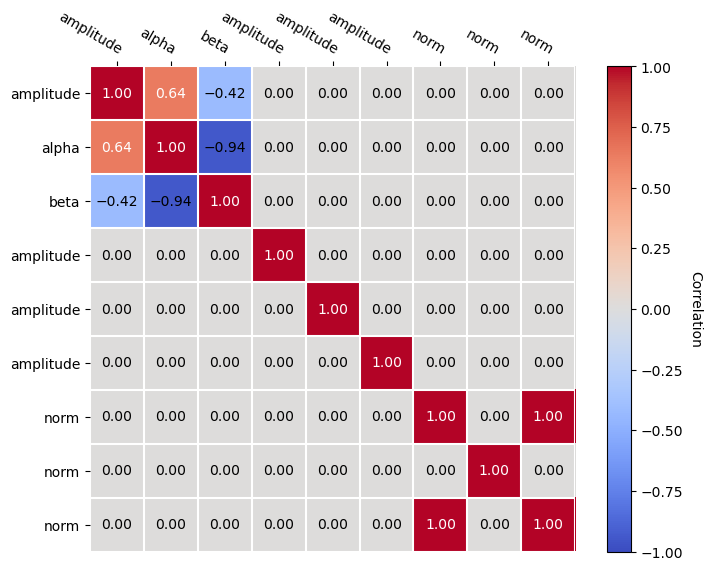

In [35]:
analysis.final_model.covariance.get_subcovariance(
    analysis.final_model.parameters.free_parameters
).plot_correlation()

In [36]:
print(analysis.final_model[config_main.target.source_name])

SkyModel

  Name                      : 4FGL J0534.5+2201i
  Datasets names            : ['Fermi-LAT_00', 'Fermi-LAT_01', 'HESS', 'MAGIC']
  Spectral model type       : CompoundSpectralModel
  Spatial  model type       : GaussianSpatialModel
  Temporal model type       : 
  Parameters:
    amplitude                     :   2.69e-07   +/- 1.2e-08 1 / (TeV s cm2)
    reference             (frozen):      0.015       TeV         
    alpha                         :      1.713   +/-    0.04             
    beta                          :      0.089   +/-    0.01             
    alpha_norm            (frozen):      1.000                   
    redshift              (frozen):      0.000                   
    lon_0                 (frozen):    184.553       deg         
    lat_0                 (frozen):     -5.781       deg         
    sigma                 (frozen):      0.020       deg         
    e                     (frozen):      0.000                   
    phi                   

In [37]:
if len(analysis.final_model[config_main.target.source_name].parameters) > 3:
    nrow = int(np.sqrt(len(analysis.final_model[config_main.target.source_name].parameters)))
    ncol = int(np.ceil(len(analysis.final_model[config_main.target.source_name].parameters) / nrow))
else:
    ncol = len(analysis.final_model[config_main.target.source_name].parameters)
    nrow = 1
print(ncol, nrow)

4 3


CPU times: user 10.8 s, sys: 121 ms, total: 10.9 s
Wall time: 10.8 s


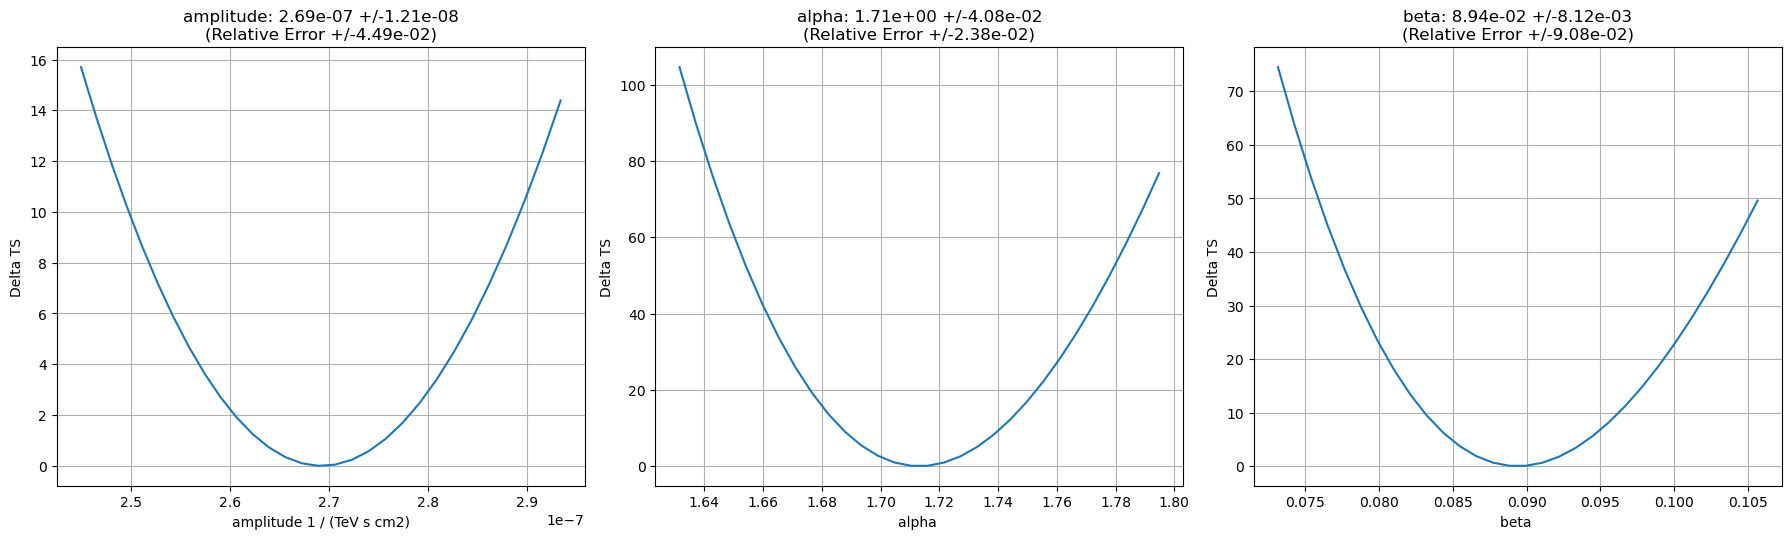

In [38]:
%%time
plt.figure(figsize=(ncol * 6, nrow * 5))
total_stat = analysis.fit_result.total_stat

for i, par in enumerate(analysis.final_model[config_main.target.source_name].parameters.free_parameters):
    par.scan_n_values = 30

    idx = analysis.final_model[config_main.target.source_name].parameters.index(par)
    name = Models(analysis.final_model[config_main.target.source_name]).parameters_unique_names[idx]

    profile = analysis.fit.stat_profile(datasets=analysis.datasets, parameter=par)

    plt.subplot(nrow, ncol, i + 1)
    plt.plot(profile[f"{name}_scan"], profile["stat_scan"] - total_stat)
    plt.xlabel(f"{par.name} {par.unit}")
    plt.ylabel("Delta TS")
    plt.grid()
    if par.value != 0:
        plt.title(f"{par.name}: {par.value:.2e} +/-{par.error:.2e}\n(Relative Error +/-{par.error/par.value:.2e})")
    else:
        plt.title(f"{par.name}: {par.value:.2e} +/-{par.error:.2e}")
plt.tight_layout()

CPU times: user 9.55 s, sys: 97.9 ms, total: 9.65 s
Wall time: 9.54 s


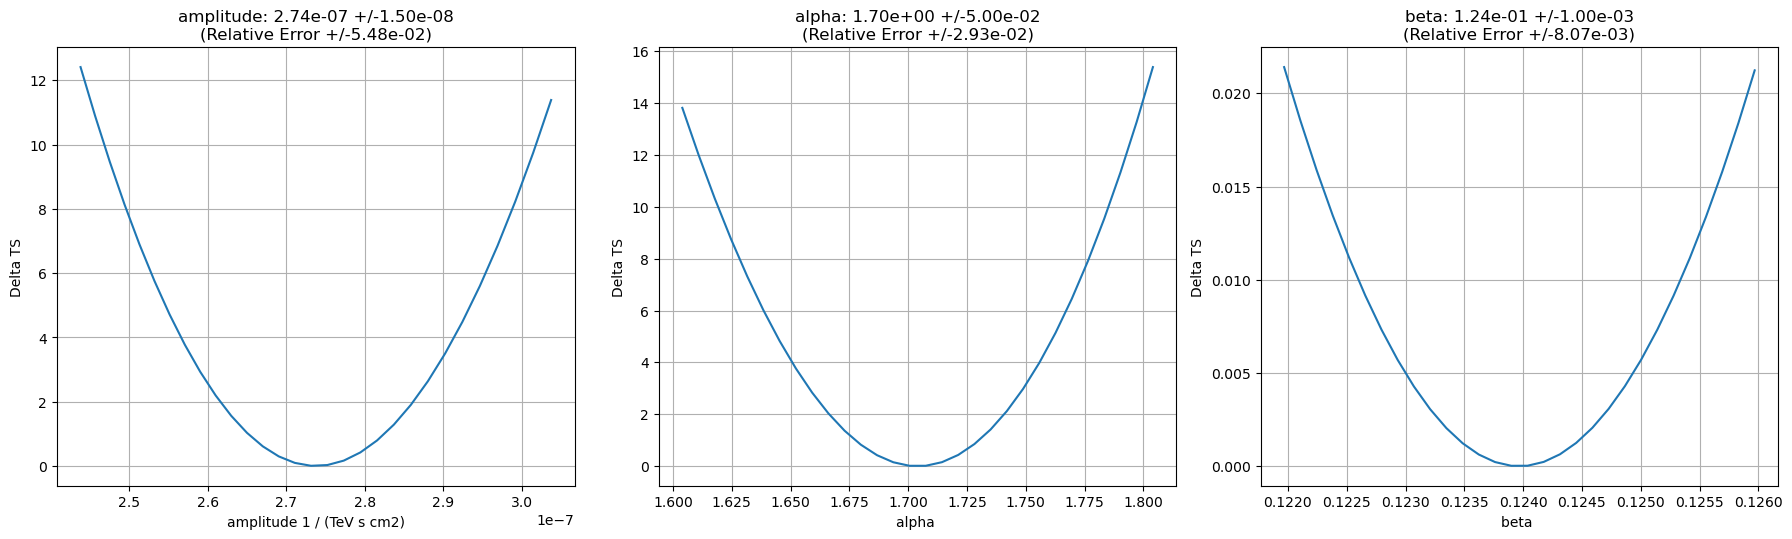

In [39]:
%%time
# Only 3D Dataset
plt.figure(figsize=(ncol * 6, nrow * 5))
total_stat = only_3d_analysis.fit_result.total_stat

for i, par in enumerate(only_3d_analysis.final_model[config_main.target.source_name].parameters.free_parameters):
    par.scan_n_values = 30

    idx = only_3d_analysis.final_model[config_main.target.source_name].parameters.index(par)
    name = Models(only_3d_analysis.final_model[config_main.target.source_name]).parameters_unique_names[idx]

    profile = only_3d_analysis.fit.stat_profile(datasets=only_3d_analysis.datasets, parameter=par)

    plt.subplot(nrow, ncol, i + 1)
    plt.plot(profile[f"{name}_scan"], profile["stat_scan"] - total_stat)
    plt.xlabel(f"{par.name} {par.unit}")
    plt.ylabel("Delta TS")
    plt.grid()
    if par.value != 0:
        plt.title(f"{par.name}: {par.value:.2e} +/-{par.error:.2e}\n(Relative Error +/-{par.error/par.value:.2e})")
    else:
        plt.title(f"{par.name}: {par.value:.2e} +/-{par.error:.2e}")
plt.tight_layout()

CPU times: user 590 ms, sys: 80.2 ms, total: 670 ms
Wall time: 565 ms


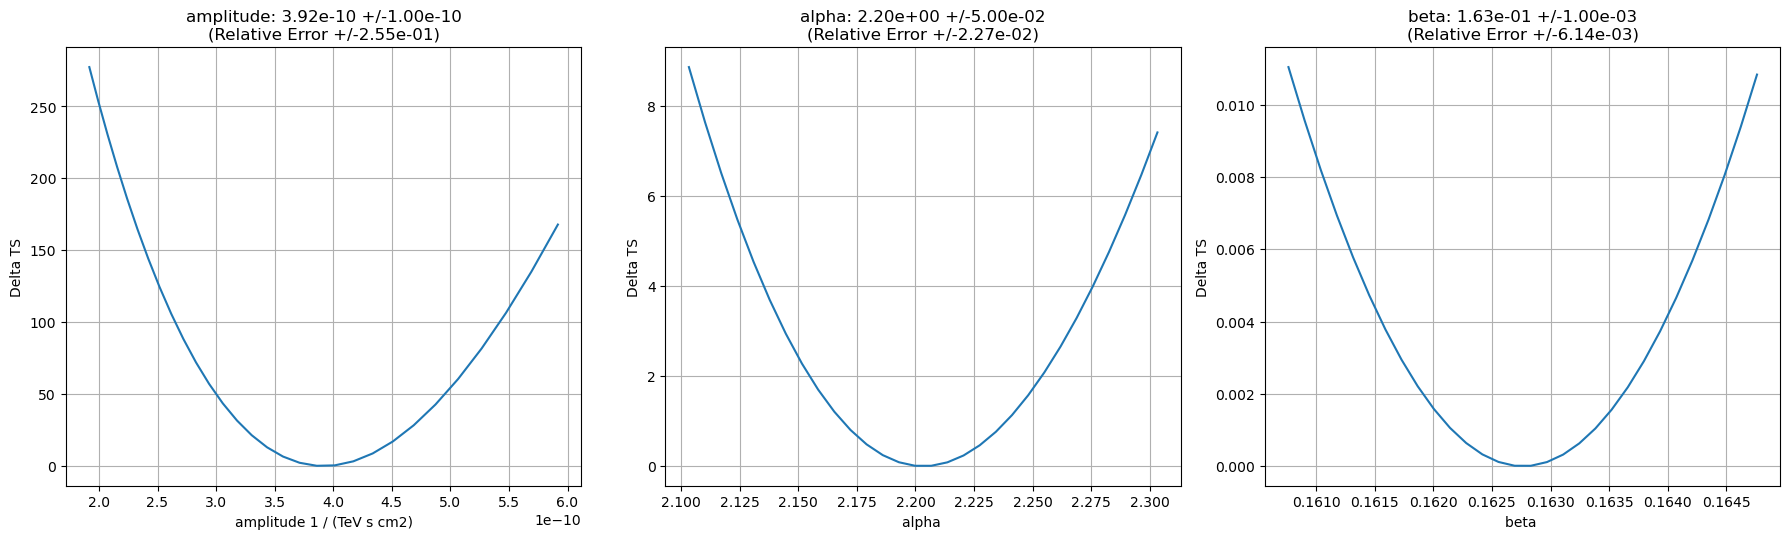

In [40]:
%%time
# Only 1D Dataset
plt.figure(figsize=(ncol * 6, nrow * 5))
total_stat = only_1d_analysis.fit_result.total_stat

for i, par in enumerate(Models(only_1d_analysis.datasets.models).parameters.free_parameters):
    par.scan_n_values = 30

    idx = only_1d_analysis.datasets.models.parameters.index(par)
    name = Models(only_1d_analysis.datasets.models).parameters_unique_names[idx]

    profile = only_1d_analysis.fit.stat_profile(datasets=only_1d_analysis.datasets, parameter=par)

    plt.subplot(nrow, ncol, i + 1)
    plt.plot(profile[f"{name}_scan"], profile["stat_scan"] - total_stat)
    plt.xlabel(f"{par.name} {par.unit}")
    plt.ylabel("Delta TS")
    plt.grid()
    if par.value != 0:
        plt.title(f"{par.name}: {par.value:.2e} +/-{par.error:.2e}\n(Relative Error +/-{par.error/par.value:.2e})")
    else:
        plt.title(f"{par.name}: {par.value:.2e} +/-{par.error:.2e}")
plt.tight_layout()

In [41]:
for fp in analysis.flux_points:
    print(fp)

FluxPoints
----------

  geom                   : RegionGeom
  axes                   : ['lon', 'lat', 'energy']
  shape                  : (1, 1, 6)
  quantities             : ['norm', 'norm_err', 'norm_errn', 'norm_errp', 'norm_ul', 'ts', 'npred', 'npred_excess', 'stat', 'stat_null', 'stat_scan', 'counts', 'success']
  ref. model             : compound
  n_sigma                : 1
  n_sigma_ul             : 2
  sqrt_ts_threshold_ul   : 2
  sed type init          : likelihood

FluxPoints
----------

  geom                   : RegionGeom
  axes                   : ['lon', 'lat', 'energy']
  shape                  : (1, 1, 15)
  quantities             : ['norm', 'norm_err', 'norm_errn', 'norm_errp', 'norm_ul', 'ts', 'npred', 'npred_excess', 'stat', 'stat_null', 'stat_scan', 'counts', 'success']
  ref. model             : compound
  n_sigma                : 1
  n_sigma_ul             : 2
  sqrt_ts_threshold_ul   : 2
  sed type init          : likelihood

FluxPoints
----------

  geom    

In [42]:
analysis.flux_points[0].to_table(formatted=True, sed_type="e2dnde")

Inferred format: gadf-sed


e_ref,e_min,e_max,e2dnde,e2dnde_err,e2dnde_errp,e2dnde_errn,e2dnde_ul,ts,sqrt_ts,npred,npred_excess,stat,stat_null,stat_scan,is_ul,counts,success,norm_scan
TeV,TeV,TeV,TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),,,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[2],float32[2],float64,float64,float64[11],bool,float64[2],bool,float64[11]
0.002,0.001,0.003,1.926e-11,1.714e-12,1.719e-12,1.709e-12,2.271e-11,135.411,11.637,18396.821381799047 .. 18155.52014988124,748.5066 .. 737.69147,41094.713,41230.125,41174.258 .. 43235.125,False,18690.0 .. 18376.0,True,0.200 .. 5.000
0.005,0.003,0.007,4.443e-11,2.781e-12,2.798e-12,2.765e-12,5.007e-11,319.159,17.865,3465.0172362594603 .. 3413.7489197036894,482.59686 .. 474.61877,15446.799,15765.958,15653.839 .. 17293.823,False,3315.0 .. 3379.0,True,0.200 .. 5.000
0.013,0.007,0.024,5.969e-11,3.135e-12,3.169e-12,3.103e-12,6.611e-11,681.141,26.099,1105.3398211280023 .. 1033.028884538449,330.40677 .. 308.03625,6882.114,7563.255,7247.430 .. 9189.501,False,973.0 .. 967.0,True,0.200 .. 5.000
0.042,0.024,0.075,7.002e-11,4.648e-12,4.744e-12,4.554e-12,7.970e-11,1057.187,32.514,234.42193555409517 .. 214.80775969870757,130.27312 .. 119.37004,2249.607,3306.794,2558.162 .. 3511.126,False,215.0 .. 193.0,True,0.200 .. 5.000
0.115,0.075,0.178,6.820e-11,8.435e-12,8.782e-12,8.095e-12,8.648e-11,677.571,26.030,52.38834930916343 .. 45.34496333247718,35.533337 .. 30.772287,714.080,1391.652,808.579 .. 1081.839,False,52.0 .. 45.0,True,0.200 .. 5.000
0.316,0.178,0.562,5.581e-11,1.076e-11,1.146e-11,1.008e-11,8.018e-11,335.941,18.329,21.21967743300513 .. 17.273847857763364,14.894065 .. 12.128058,266.638,602.579,304.757 .. 424.648,False,15.0 .. 19.0,True,0.200 .. 5.000


In [43]:
analysis.flux_points[1].to_table(formatted=True, sed_type="e2dnde")

Inferred format: gadf-sed


e_ref,e_min,e_max,e2dnde,e2dnde_err,e2dnde_errp,e2dnde_errn,e2dnde_ul,ts,sqrt_ts,npred,npred_excess,stat,stat_null,stat_scan,is_ul,counts,success,norm_scan
TeV,TeV,TeV,TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),,,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[1],float32[1],float64,float64,float64[11],bool,float64[1],bool,float64[11]
0.126,0.100,0.158,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.000,0.000,nan .. nan,False,0.0,False,0.200 .. 5.000
0.200,0.158,0.251,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.000,0.000,nan .. nan,False,0.0,False,0.200 .. 5.000
0.316,0.251,0.398,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.000,0.000,nan .. nan,False,0.0,False,0.200 .. 5.000
0.501,0.398,0.631,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.000,0.000,nan .. nan,False,0.0,False,0.200 .. 5.000
0.794,0.631,1.000,5.560e-11,4.624e-12,4.701e-12,4.551e-12,6.517e-11,163.720,12.795,217.99877415953551,188.99861,0.000,163.720,117.530 .. 607.905,False,218.0,True,0.200 .. 5.000
1.259,1.000,1.585,3.663e-11,3.911e-12,4.022e-12,3.808e-12,4.491e-11,105.412,10.267,106.97434631408177,99.972664,0.000,105.412,70.729 .. 479.013,False,107.0,True,0.200 .. 5.000
1.995,1.585,2.512,3.033e-11,4.149e-12,4.271e-12,4.044e-12,3.917e-11,60.827,7.799,78.93067922620756,68.92189,0.000,60.827,41.295 .. 287.048,False,79.0,True,0.200 .. 5.000
3.162,2.512,3.981,2.149e-11,3.949e-12,4.090e-12,3.827e-12,2.999e-11,33.206,5.762,46.99775510304704,39.99742,0.000,33.206,21.865 .. 181.175,False,47.0,True,0.200 .. 5.000


In [44]:
analysis.flux_points[2].to_table(formatted=True, sed_type="e2dnde")

Inferred format: gadf-sed


e_ref,e_min,e_max,e2dnde,e2dnde_err,e2dnde_errp,e2dnde_errn,e2dnde_ul,ts,sqrt_ts,npred,npred_excess,stat,stat_null,stat_scan,is_ul,counts,success,norm_scan
TeV,TeV,TeV,TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),,,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[1],float32[1],float64,float64,float64[11],bool,float64[1],bool,float64[11]
0.098,0.078,0.122,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.000,0.000,nan .. nan,False,0.0,False,0.200 .. 5.000
0.153,0.122,0.191,6.378e-11,6.205e-12,6.332e-12,6.081e-12,7.670e-11,166.102,12.888,201.99972275854557,151.9997,0.000,166.102,89.852 .. 810.838,False,202.0,True,0.200 .. 5.000
0.239,0.191,0.299,6.447e-11,6.012e-12,6.169e-12,5.857e-12,7.712e-11,226.835,15.061,146.00958473398643,131.67656,0.000,226.835,125.307 .. 653.916,False,146.0,True,0.200 .. 5.000
0.374,0.299,0.468,7.112e-11,6.744e-12,6.937e-12,6.556e-12,8.539e-11,238.537,15.445,128.99671041334378,120.99664,0.000,238.537,148.528 .. 424.102,False,129.0,True,0.200 .. 5.000
0.585,0.468,0.731,4.384e-11,5.875e-12,6.132e-12,5.623e-12,5.663e-11,138.613,11.773,57.999447502449435,56.999443,0.000,138.613,67.359 .. 358.974,False,58.0,True,0.200 .. 5.000
0.914,0.731,1.143,5.505e-11,7.693e-12,8.037e-12,7.358e-12,7.183e-11,120.949,10.998,54.999558939292996,53.332886,0.000,120.949,78.102 .. 165.732,False,55.0,True,0.200 .. 5.000
1.430,1.143,1.788,2.857e-11,6.352e-12,6.818e-12,5.904e-12,4.317e-11,50.664,7.118,20.999737498210393,20.666403,0.000,50.664,23.978 .. 135.926,False,21.0,True,0.200 .. 5.000
2.236,1.788,2.796,2.949e-11,7.614e-12,8.283e-12,6.973e-12,4.744e-11,41.589,6.449,14.999962561514568,14.999963,0.000,41.589,25.039 .. 62.155,False,15.0,True,0.200 .. 5.000


Text(0.5, 1.0, 'TS Profiles')

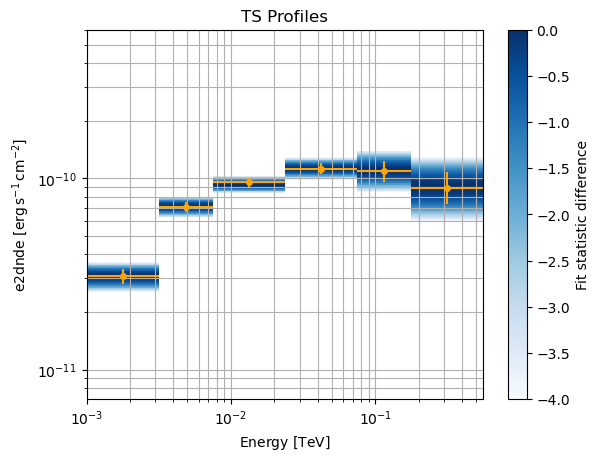

In [45]:
# Checking TS profiles of only Joint-Fit
analysis.flux_points[0].plot_ts_profiles(sed_type="e2dnde")
analysis.flux_points[0].plot(sed_type="e2dnde", color="orange")

plt.grid(which="both")
plt.title("TS Profiles")

Text(0.5, 1.0, 'TS Profiles')

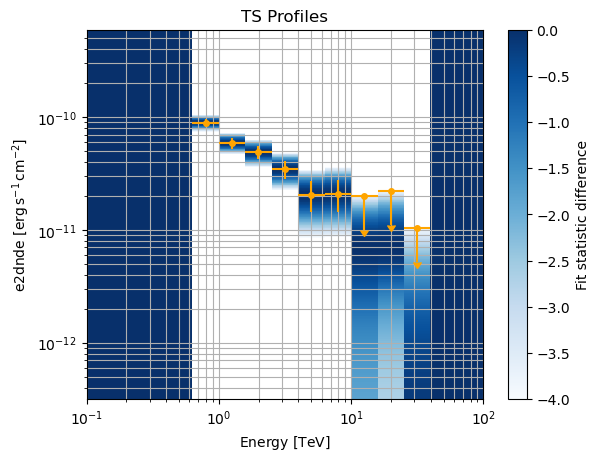

In [46]:
analysis.flux_points[1].plot_ts_profiles(sed_type="e2dnde")
analysis.flux_points[1].plot(sed_type="e2dnde", color="orange")

plt.grid(which="both")
plt.title("TS Profiles")

Text(0.5, 1.0, 'TS Profiles')

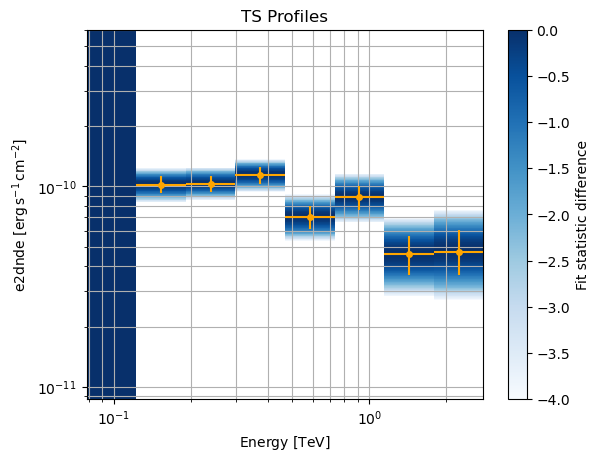

In [47]:
analysis.flux_points[2].plot_ts_profiles(sed_type="e2dnde")
analysis.flux_points[2].plot(sed_type="e2dnde", color="orange")

plt.grid(which="both")
plt.title("TS Profiles")

In [48]:
e_plot_min = 800 * u.MeV
e_plot_max = 50 * u.TeV

en_sed_min_0 = 1 * u.GeV
en_sed_min_1 = 50 * u.GeV
en_sed_max_0 = 0.5 * u.TeV
en_sed_max_1 = 50 * u.TeV

sed_kwargs = {"sed_type": "e2dnde", "energy_bounds": [en_sed_min_0, en_sed_max_1]}
sed_plot_kwargs = {
    "sed_type": "e2dnde",
}

In [49]:
joint_model = analysis.final_model[0]
joint_model.spatial_model = None

lat_model = only_3d_analysis.final_model[0]
lat_model.spatial_model = None

joint_fpd_lat = FluxPointsDataset(models=joint_model, data=analysis.flux_points[0])
joint_fpd_lat._models = Models(joint_model)

joint_fpd_hess = FluxPointsDataset(models=joint_model, data=analysis.flux_points[1])
joint_fpd_hess._models = Models(joint_model)

joint_fpd_magic = FluxPointsDataset(models=joint_model, data=analysis.flux_points[2])
joint_fpd_magic._models = Models(joint_model)

only_lat_fpd = FluxPointsDataset(data=only_3d_analysis.flux_points[0])
only_lat_fpd._models = Models(lat_model)

only_1d_fpd_hess = FluxPointsDataset(models=only_1d_analysis.final_model[0], data=only_1d_analysis.flux_points[0])
only_1d_fpd_hess._models = Models(only_1d_analysis.final_model[0])

only_1d_fpd_magic = FluxPointsDataset(models=only_1d_analysis.final_model[0], data=only_1d_analysis.flux_points[1])
only_1d_fpd_magic._models = Models(only_1d_analysis.final_model[0])

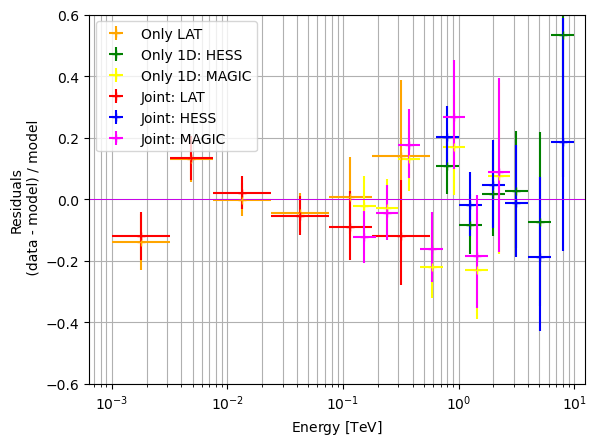

In [50]:
only_lat_fpd.plot_residuals(method="diff/model", label="Only LAT", color="orange")
only_1d_fpd_hess.plot_residuals(method="diff/model", label="Only 1D: HESS", color="green")
only_1d_fpd_magic.plot_residuals(method="diff/model", label="Only 1D: MAGIC", color="yellow")

joint_fpd_lat.plot_residuals(method="diff/model", label="Joint: LAT", color="red")
joint_fpd_hess.plot_residuals(method="diff/model", label="Joint: HESS", color="blue")
joint_fpd_magic.plot_residuals(method="diff/model", label="Joint: MAGIC", color="magenta")

plt.grid(which="both")
plt.legend()

(0.0007999999999999999, 50.0)

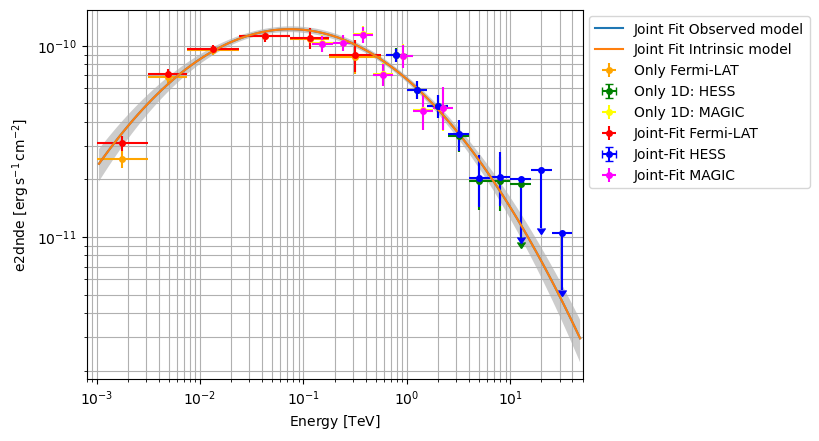

In [51]:
only_3d_analysis.flux_points[0].plot(sed_type="e2dnde", color="orange", label="Only Fermi-LAT")
only_1d_analysis.flux_points[0].plot(sed_type="e2dnde", color="green", label="Only 1D: HESS")
only_1d_analysis.flux_points[1].plot(sed_type="e2dnde", color="yellow", label="Only 1D: MAGIC")

analysis.flux_points[0].plot(sed_type="e2dnde", color="red", label="Joint-Fit Fermi-LAT")
analysis.flux_points[1].plot(sed_type="e2dnde", color="blue", label="Joint-Fit HESS")
analysis.flux_points[2].plot(sed_type="e2dnde", color="magenta", label="Joint-Fit MAGIC")

sed_kwargs["label"] = ""
analysis.final_model[0].spectral_model.plot_error(**sed_kwargs)
sed_kwargs["label"] = "Joint Fit Observed model"
analysis.final_model[0].spectral_model.plot(**sed_kwargs)
sed_kwargs["label"] = "Joint Fit Intrinsic model"
analysis.final_model[0].spectral_model.model1.plot(**sed_kwargs)

plt.grid(which="both")
plt.legend(bbox_to_anchor=(1, 1))
plt.xlim(e_plot_min, e_plot_max)

(0.0007999999999999999, 50.0)

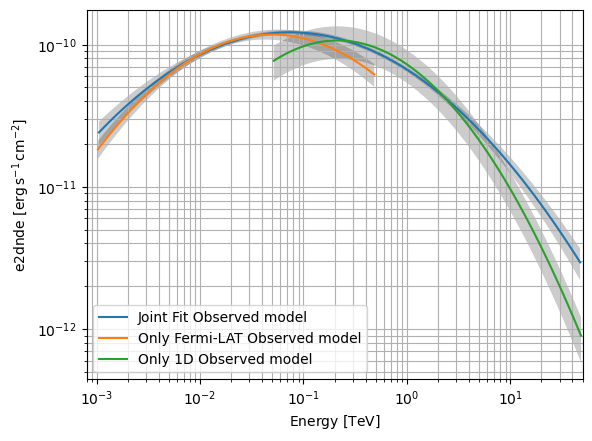

In [52]:
# Only Models
sed_kwargs["label"] = ""
sed_kwargs["energy_bounds"] = [en_sed_min_0, en_sed_max_1]
analysis.final_model[0].spectral_model.plot_error(**sed_kwargs)
sed_kwargs["label"] = "Joint Fit Observed model"
analysis.final_model[0].spectral_model.plot(**sed_kwargs)

sed_kwargs["label"] = ""
sed_kwargs["energy_bounds"] = [en_sed_min_0, en_sed_max_0]
only_3d_analysis.final_model[0].spectral_model.plot_error(**sed_kwargs)
sed_kwargs["label"] = "Only Fermi-LAT Observed model"
only_3d_analysis.final_model[0].spectral_model.plot(**sed_kwargs)

sed_kwargs["label"] = ""
sed_kwargs["energy_bounds"] = [en_sed_min_1, en_sed_max_1]
only_1d_analysis.datasets.models[0].spectral_model.plot_error(**sed_kwargs)
sed_kwargs["label"] = "Only 1D Observed model"
only_1d_analysis.datasets.models[0].spectral_model.plot(**sed_kwargs)

plt.grid(which="both")
plt.legend()
plt.xlim(e_plot_min, e_plot_max)